<a href="https://colab.research.google.com/github/rahulsingh7111711/try/blob/main/Copy_of_mp4m2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sales Data Analysis using AI/ML

In [ ]:
# import python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
# Correct raw URL for the CSV file
url = 'https://raw.githubusercontent.com/rahulsingh7111711/try/main/data1.csv'

# Attempt to load the CSV file from GitHub with a different encoding and handle bad lines
try:
    df = pd.read_csv(url, encoding='iso-8859-1', on_bad_lines='skip')
except pd.errors.ParserError as e:
    print("ParserError:", e)
    df_head = pd.read_csv(url, encoding='iso-8859-1', nrows=50, on_bad_lines='skip')
except Exception as e:
    print("Error:", e)

In [ ]:
df.shape

(11251, 12)

In [ ]:
df.head()

,User_ID,Cust_name,Prod_ID,Gender,Age Grp,Age,Marital_Stat,State,Occupation,Prod_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Govt,Auto,3,23934.0
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Automobile,Auto,3,23924.0
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Construction,Auto,2,23912.0
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Food Processing,Auto,2,23877.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   User_ID        11251 non-null  int64  
 1   Cust_name      11251 non-null  object 
 2   Prod_ID        11251 non-null  object 
 3   Gender         11251 non-null  object 
 4   Age Grp        11251 non-null  object 
 5   Age            11251 non-null  int64  
 6   Marital_Stat   11251 non-null  int64  
 7   State          11251 non-null  object 
 8   Occupation     11251 non-null  object 
 9   Prod_Category  11251 non-null  object 
 10  Orders         11251 non-null  int64  
 11  Amount         11239 non-null  float64
dtypes: float64(1), int64(4), object(7)
memory usage: 1.0+ MB


In [ ]:
#drop unrelated/blank columns
#df.drop(['Status', 'unnamed1'], axis=1, inplace=True)

In [ ]:
#check for null values
pd.isnull(df).sum()

User_ID           0
Cust_name         0
Prod_ID           0
Gender            0
Age Grp           0
Age               0
Marital_Stat      0
State             0
Occupation        0
Prod_Category     0
Orders            0
Amount           12
dtype: int64

In [ ]:
# drop null values
df.dropna(inplace=True)

In [ ]:
# change data type
df['Amount'] = df['Amount'].astype('int')

In [ ]:
df['Amount'].dtypes

dtype('int64')

In [ ]:
df.columns

Index(['User_ID', 'Cust_name', 'Prod_ID', 'Gender', 'Age Grp', 'Age',
       'Marital_Stat', 'State', 'Occupation', 'Prod_Category', 'Orders',
       'Amount'],
      dtype='object')

In [ ]:
#rename column
df.rename(columns= {'Marital_Status':'Shaadi'})

,User_ID,Cust_name,Prod_ID,Gender,Age Grp,Age,Marital_Stat,State,Occupation,Prod_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Healthcare,Auto,1,23952
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Govt,Auto,3,23934
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Automobile,Auto,3,23924
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Construction,Auto,2,23912
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Food Processing,Auto,2,23877
...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,18-25,19,1,Maharashtra,Chemical,Office,4,370
11247,1004089,Reichenbach,P00171342,M,26-35,33,0,Haryana,Healthcare,Veterinary,3,367
11248,1001209,Oshin,P00201342,F,36-45,40,0,Madhya Pradesh,Textile,Office,4,213
11249,1004023,Noonan,P00059442,M,36-45,37,0,Karnataka,Agriculture,Office,3,206


In [ ]:
# describe() method returns description of the data in the DataFrame (i.e. count, mean, std, etc)
df.describe()

,User_ID,Age,Marital_Stat,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610553
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355168
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


In [ ]:
# use describe() for specific columns
df[['Age', 'Orders', 'Amount']].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553
std,12.753866,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


# **Exploratory Data Analysis**

## **Gender**



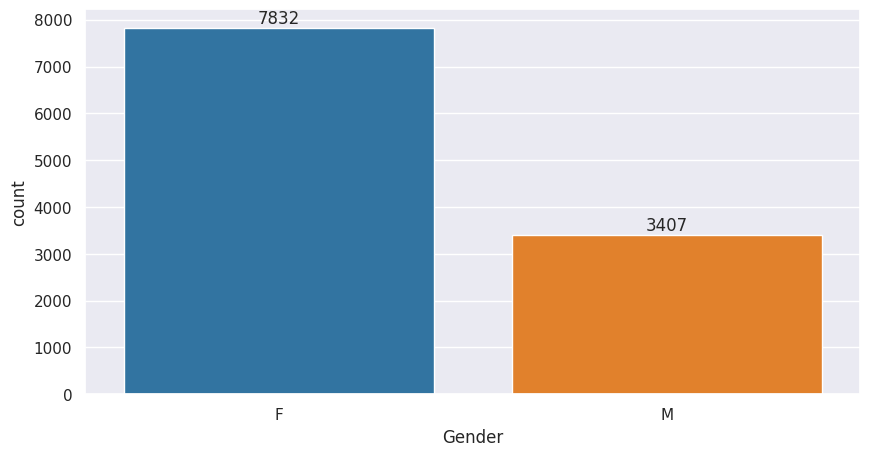

In [ ]:
# plotting a bar chart for Gender and it's count
sns.set(rc={'figure.figsize':(10,5)})  # Adjusted figure size for better visibility
ax = sns.countplot(x='Gender', data=df, hue='Gender', dodge=False, palette='tab10')
# Hide the legend since 'hue' is only used for coloring purposes
plt.legend([], [], frameon=False)
# Add labels to the bars
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

From above graphs we can see that most of the buyers are females and even the purchasing power of females are greater than men

## **Age**

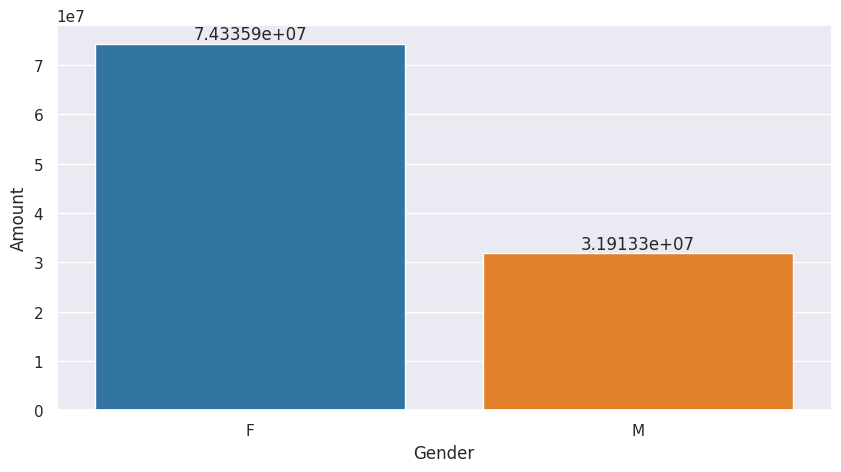

In [ ]:
# plotting a bar chart for gender vs total amount
sales_gen = df.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
sns.set(rc={'figure.figsize':(10,5)})  # Adjusted figure size for better visibility
ax = sns.barplot(x='Gender', y='Amount', data=sales_gen, hue='Gender', dodge=False, palette='tab10')
plt.legend([],[], frameon=False)  # Hide the legend
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

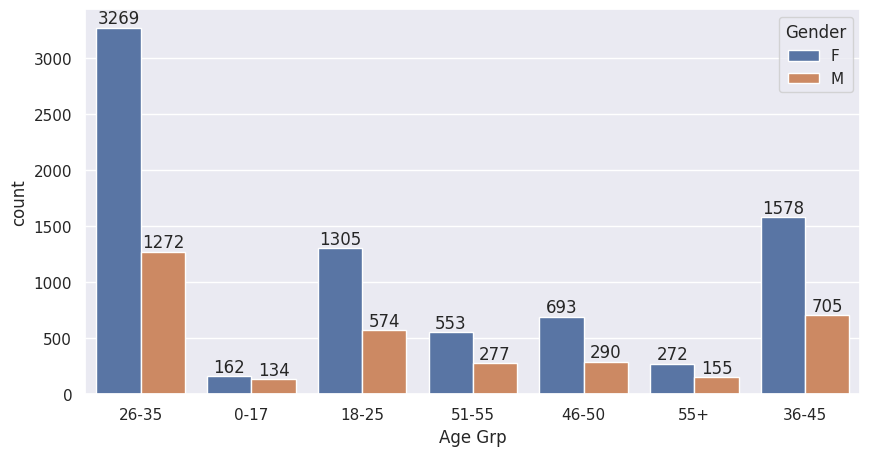

In [ ]:
ax = sns.countplot(data = df, x = 'Age Grp', hue = 'Gender')
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Age Grp', ylabel='Amount'>

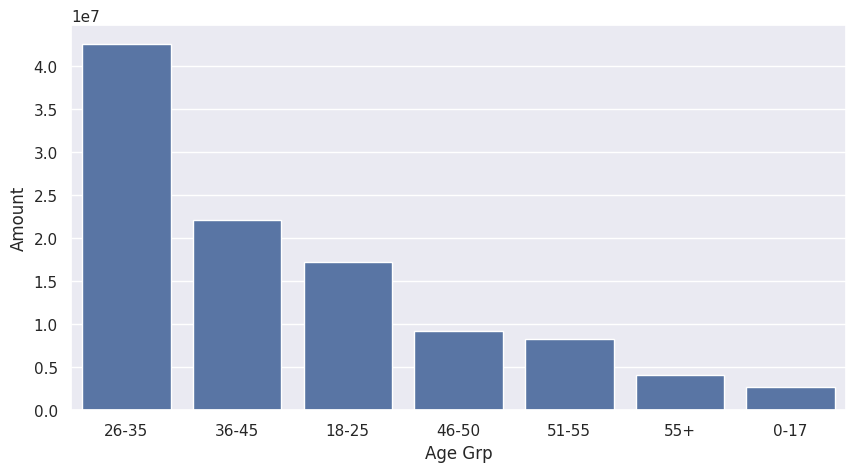

In [ ]:
# Total Amount vs Age Group
sales_age = df.groupby(['Age Grp'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
sns.barplot(x = 'Age Grp',y= 'Amount' ,data = sales_age)

From above graphs we can see that most of the buyers are of age group between 26-35 yrs female

## **State**

<Axes: xlabel='State', ylabel='Orders'>

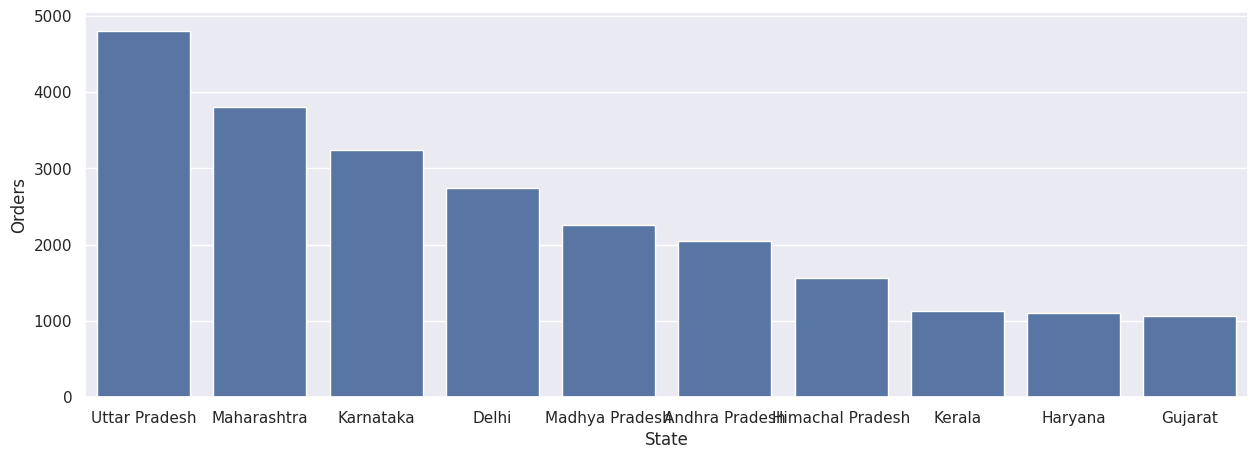

In [ ]:
# total number of orders from top 10 states

sales_state = df.groupby(['State'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)
sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(data = sales_state, x = 'State',y= 'Orders')

<Axes: xlabel='State', ylabel='Amount'>

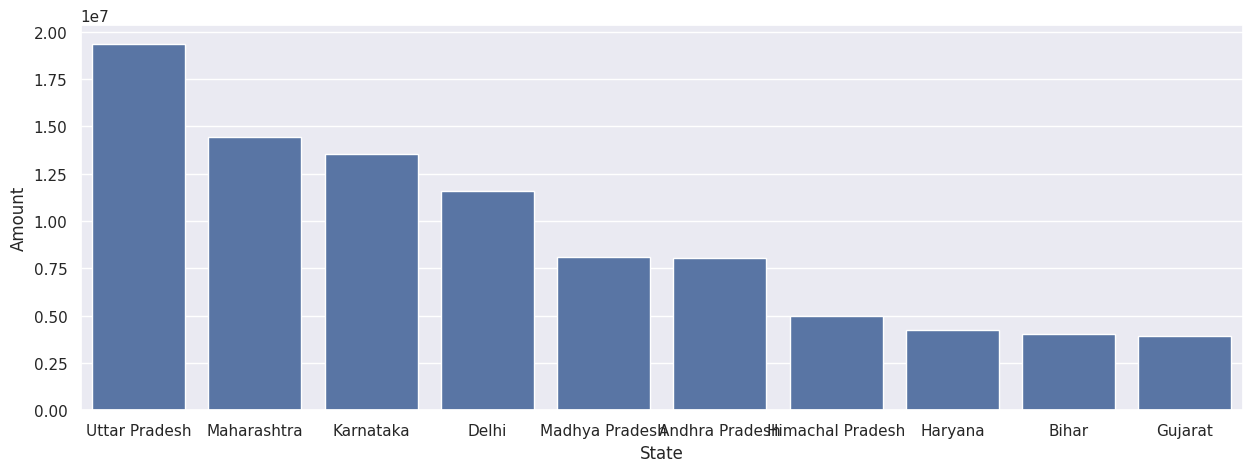

In [ ]:
# total amount/sales from top 10 states

sales_state = df.groupby(['State'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)
sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(data = sales_state, x = 'State',y= 'Amount')

From above graphs we can see that most of the orders & total sales/amount are from Uttar Pradesh, Maharashtra and Karnataka respectively

## **Marital Status**

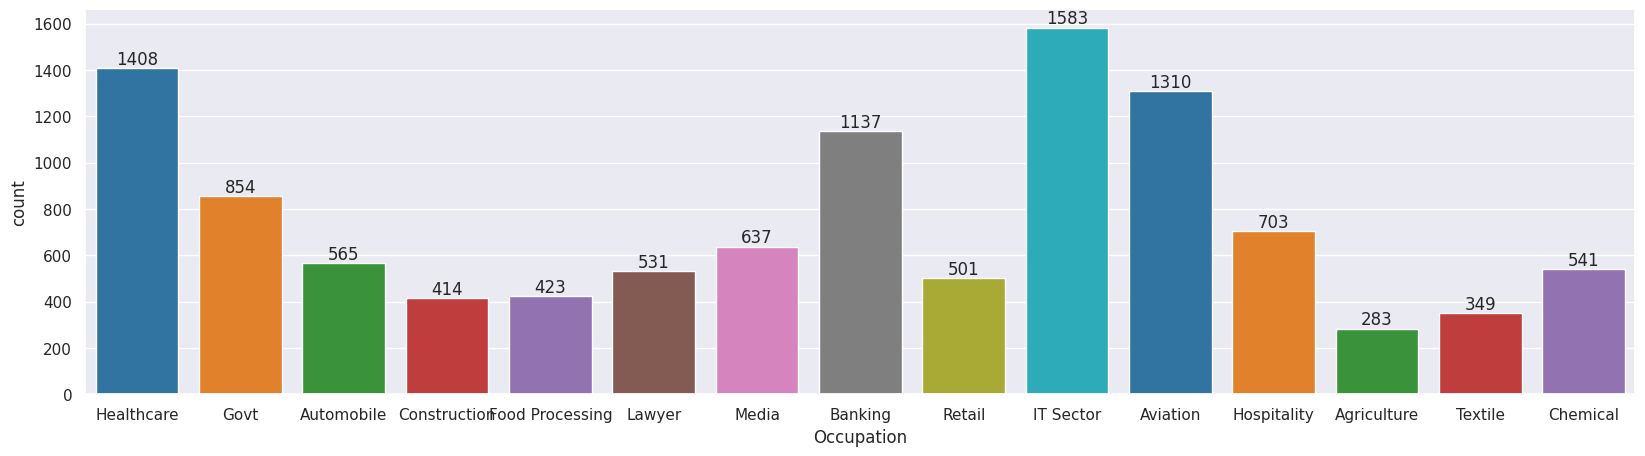

In [ ]:
sns.set(rc={'figure.figsize':(20,5)})
ax = sns.countplot(data=df, x='Occupation', hue='Occupation', dodge=False, palette='tab10')  # Add hue and dodge parameters
plt.legend([],[], frameon=False)  # Hide the legend
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

<Axes: xlabel='Marital_Stat', ylabel='Amount'>

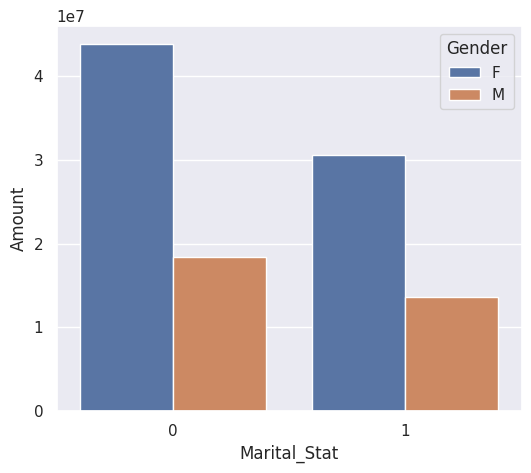

In [ ]:
sales_state = df.groupby(['Marital_Stat', 'Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
sns.set(rc={'figure.figsize':(6,5)})
sns.barplot(data = sales_state, x = 'Marital_Stat',y= 'Amount', hue='Gender')

## **Occupation**

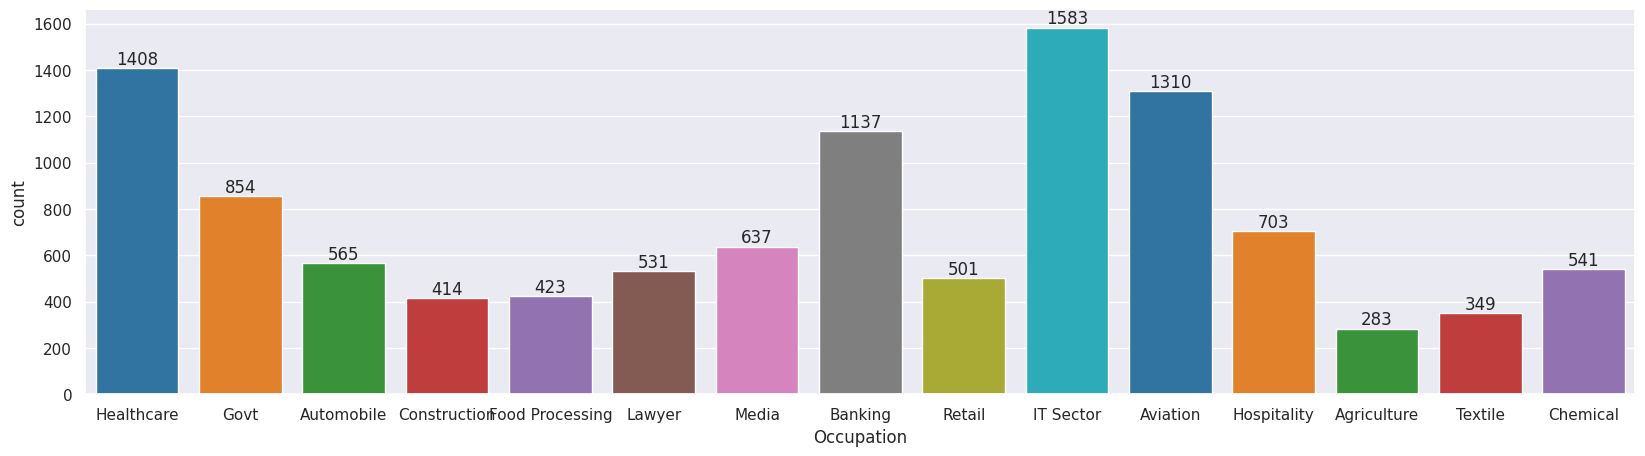

In [ ]:
sns.set(rc={'figure.figsize':(20,5)})
ax = sns.countplot(data=df, x='Occupation', hue='Occupation', dodge=False, palette='tab10')  # Add hue and dodge parameters
plt.legend([],[], frameon=False)  # Hide the legend
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

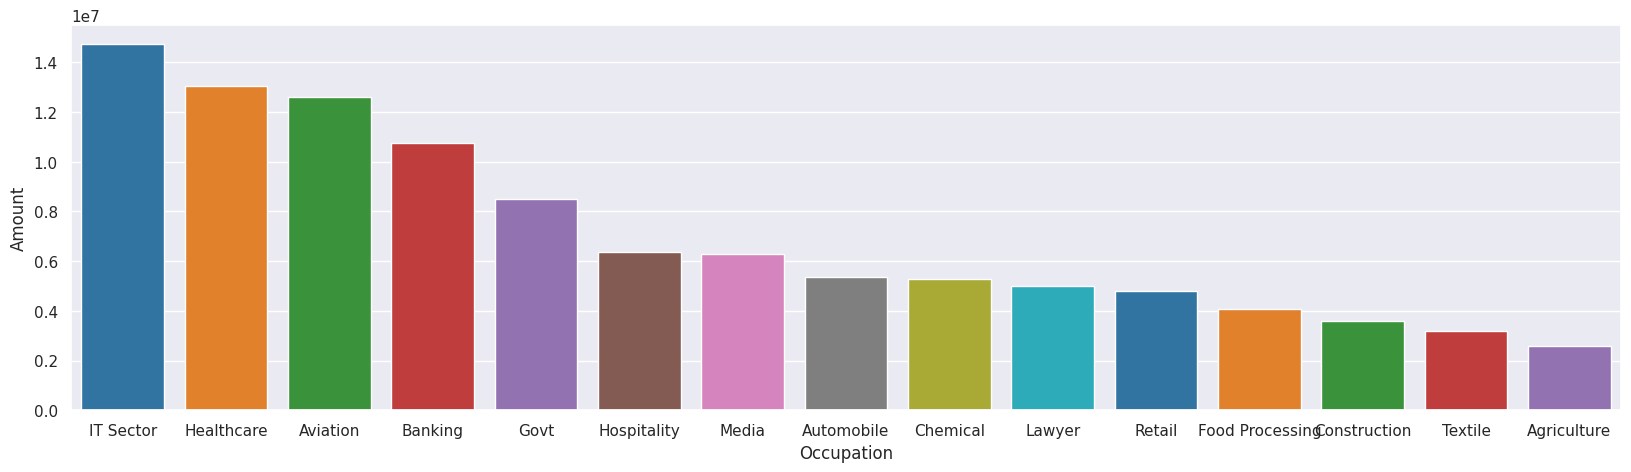

In [ ]:
sales_state = df.groupby(['Occupation'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data=sales_state, x='Occupation', y='Amount', hue='Occupation', dodge=False, palette='tab10')
plt.legend([],[], frameon=False)  # Hide the legend

From above graphs we can see that most of the buyers are working in IT, Healthcare and Aviation sector

## **Product Category**

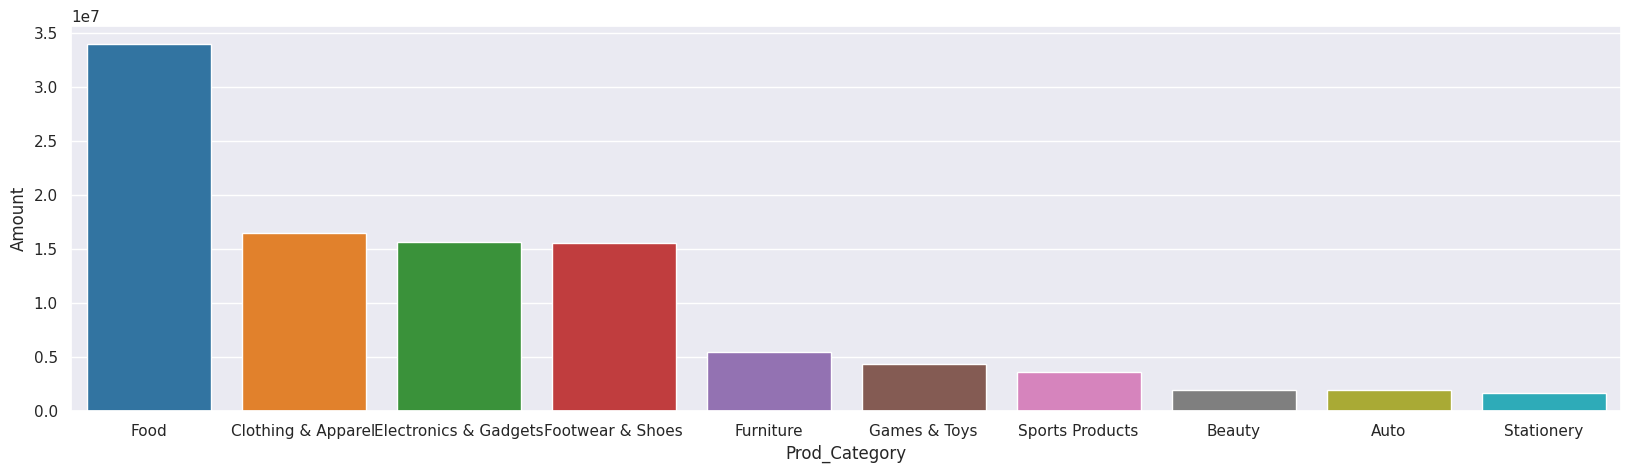

In [ ]:
sales_state = df.groupby(['Prod_Category'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)
sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data=sales_state, x='Prod_Category', y='Amount', hue='Prod_Category', dodge=False, palette='tab10')
plt.legend([],[], frameon=False)  # Hide the legend
plt.show()

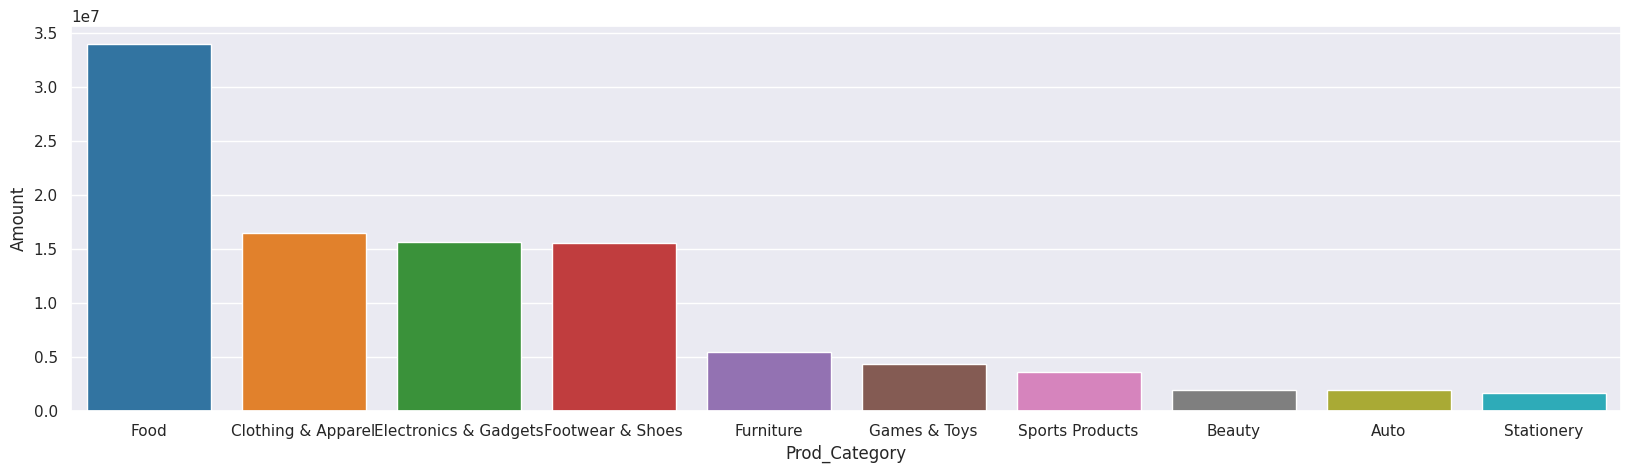

In [ ]:
sales_state = df.groupby(['Prod_Category'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)
sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data=sales_state, x='Prod_Category', y='Amount', hue='Prod_Category', dodge=False, palette='tab10')
plt.legend([],[], frameon=False)  # Hide the legend
plt.show()

From above graphs we can see that most of the sold products are from Food, Clothing and Electronics category

## **Product ID**

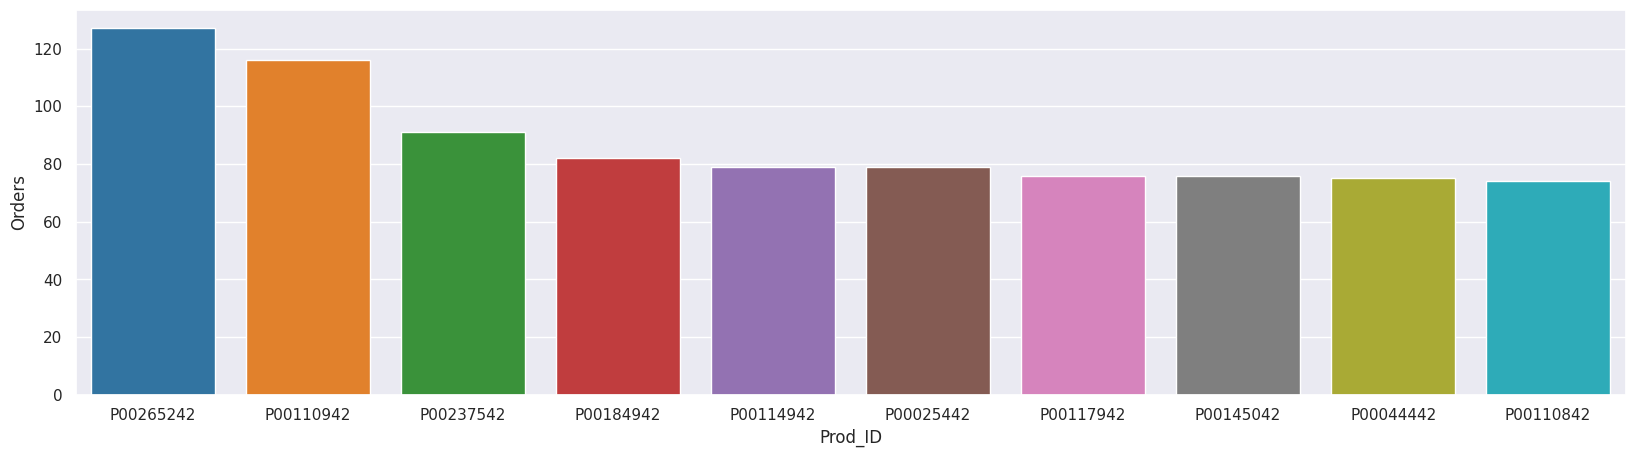

In [ ]:
sales_state = df.groupby(['Prod_ID'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)
sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data=sales_state, x='Prod_ID', y='Orders', hue='Prod_ID', dodge=False, palette='tab10')
plt.legend([],[], frameon=False)  # Hide the legend
plt.show()

<Axes: xlabel='Prod_ID'>

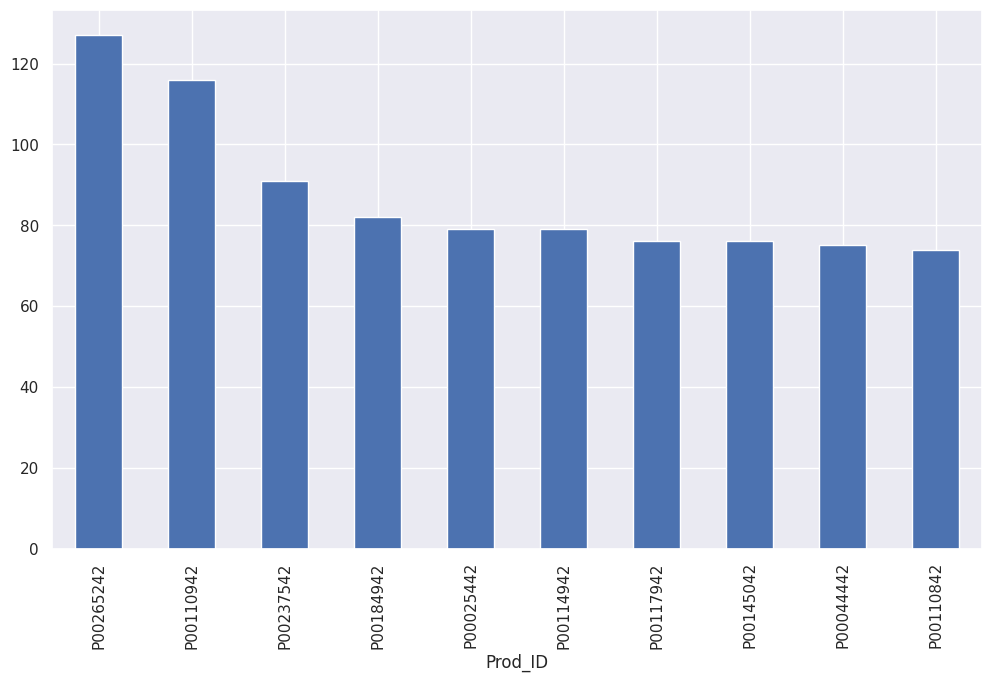

In [ ]:
# top 10 most sold products (same thing as above)
fig1, ax1 = plt.subplots(figsize=(12,7))
df.groupby('Prod_ID')['Orders'].sum().nlargest(10).sort_values(ascending=False).plot(kind='bar')

# **Conclusion**

Married women age group 26-35 yrs from UP, Maharastra and Karnataka working in IT, Healthcare and Aviation are more likely to buy products from Food, Clothing and Electronics category